<a href="https://colab.research.google.com/github/mehrdadkazemi254/MachineLearning/blob/main/Chapter7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [110]:
df = make_moons(random_state=0)
x = df[0]
y = df[1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

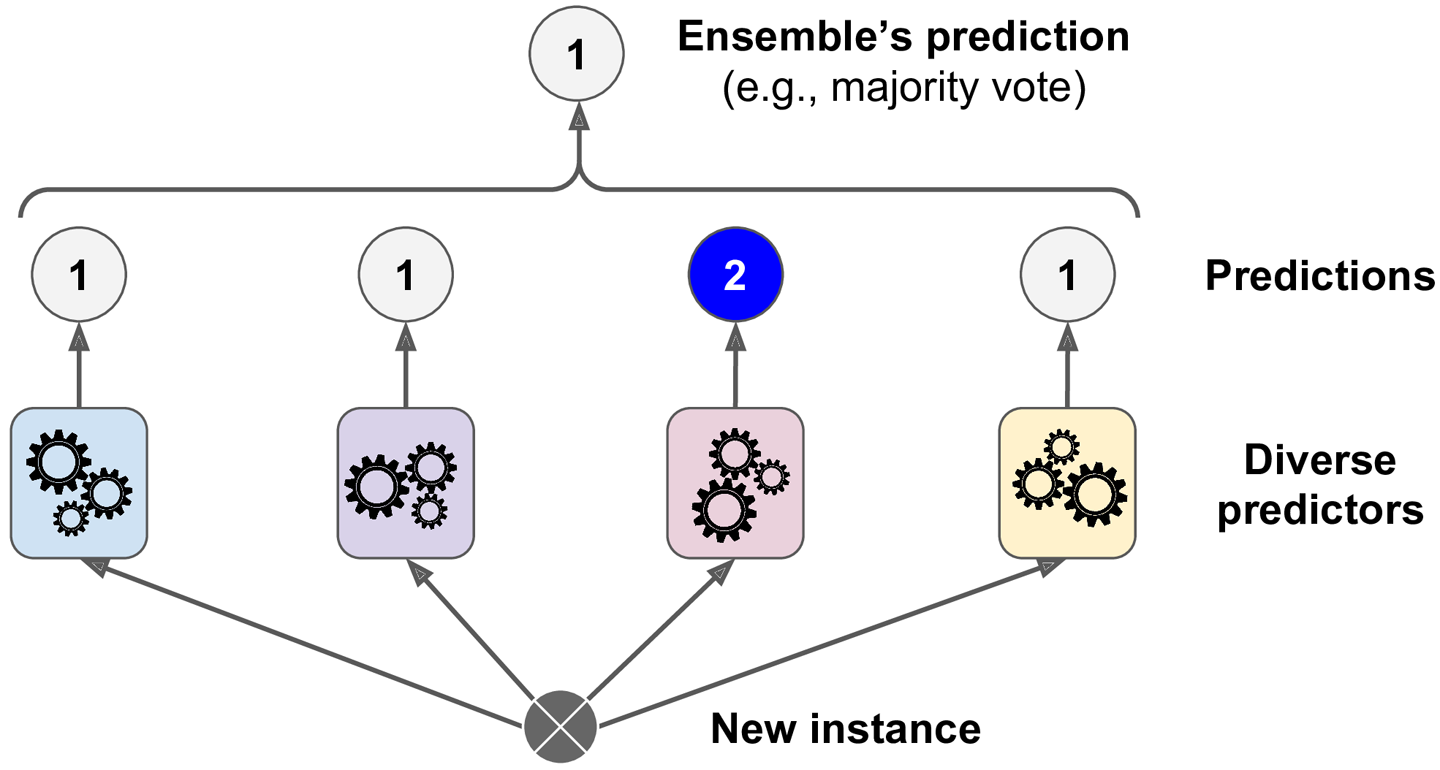

In [111]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
svm_clf = SVC(probability=True)
rnd_clf = RandomForestClassifier()

voting_clf = VotingClassifier(estimators=[('logistic',log_clf),('svm',svm_clf),('random_forest',rnd_clf)],
                              voting='soft') #soft vs. hard voting
voting_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('svm', SVC(probability=True)),
                             ('random_forest', RandomForestClassifier())],
                 voting='soft')

In [112]:
from sklearn.metrics import accuracy_score

for clf in [log_clf, svm_clf, rnd_clf, voting_clf]:
  clf.fit(x_train,y_train)
  pred = clf.predict(x_test)
  print(clf.__class__.__name__, accuracy_score(y_test,pred))

LogisticRegression 0.85
SVC 1.0
RandomForestClassifier 0.95
VotingClassifier 1.0


**Bagging** *(bootstrap aggregating)* **and Pasting**

In [113]:
#bagging: with replacement(bootstrap=True)(this way we could end up using an instance more than once in a classifier)
#pasting: without replacement(bootstrap=False)
#everything happens at the level of one classifier. so you sample data for classifier 1 and then reset and then moving on to the next classifier.
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=float(1), n_jobs=-1 ,bootstrap=True)
bag_clf.fit(x_train,y_train)
pred = bag_clf.predict(x_test)
accuracy_score(y_test,pred)

0.9

Out Of Bag(OOB) evaluation

In [114]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=float(1), n_jobs=-1 ,bootstrap=True, oob_score=True)
bag_clf.fit(x_train, y_train)
bag_clf.oob_score_
#the score is very close to the accuracy score above

0.95

In [115]:
print(len(bag_clf.oob_decision_function_))
print('\n')
bag_clf.oob_decision_function_
#for example the first instance has a 91% chance of belonging to the first class

80




array([[0.        , 1.        ],
       [0.95808383, 0.04191617],
       [0.        , 1.        ],
       [0.98305085, 0.01694915],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.1865285 , 0.8134715 ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.865     , 0.135     ],
       [0.39893617, 0.60106383],
       [0.46994536, 0.53005464],
       [1.        , 0.        ],
       [0.85416667, 0.14583333],
       [0.42631579, 0.57368421],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.37423313, 0.62576687],
       [0.84745763, 0.15254237],
       [1.        , 0.        ],
       [0.99441341, 0.00558659],
       [0.97814208, 0.02185792],
       [0.19101124, 0.80898876],
       [0.86934673, 0.13065327],
       [0.00995025, 0.99004975],
       [1.

In [116]:
bag_clf.classes_

array([0, 1])

**Random Patches and Random Subspaces**

Sampling both training instances and features is called the **Random Patches** method. Keeping all training instances (i.e., bootstrap=False and max_samples=1.0) but sampling features (i.e., bootstrap_features=True and/or max_features smaller than 1.0) is called the **Random Subspaces** method.

In [117]:
rnd_patches_cls = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_features=1.0, max_samples=1.0, bootstrap=True, bootstrap_features=True)
rnd_patches_cls.fit(x_train,y_train)
rnd_pred = rnd_patches_cls.predict(x_test)
accuracy_score(y_test,rnd_pred)
#Sampling features results in even more predictor diversity, trading a bit more bias for a lower variance.

0.95

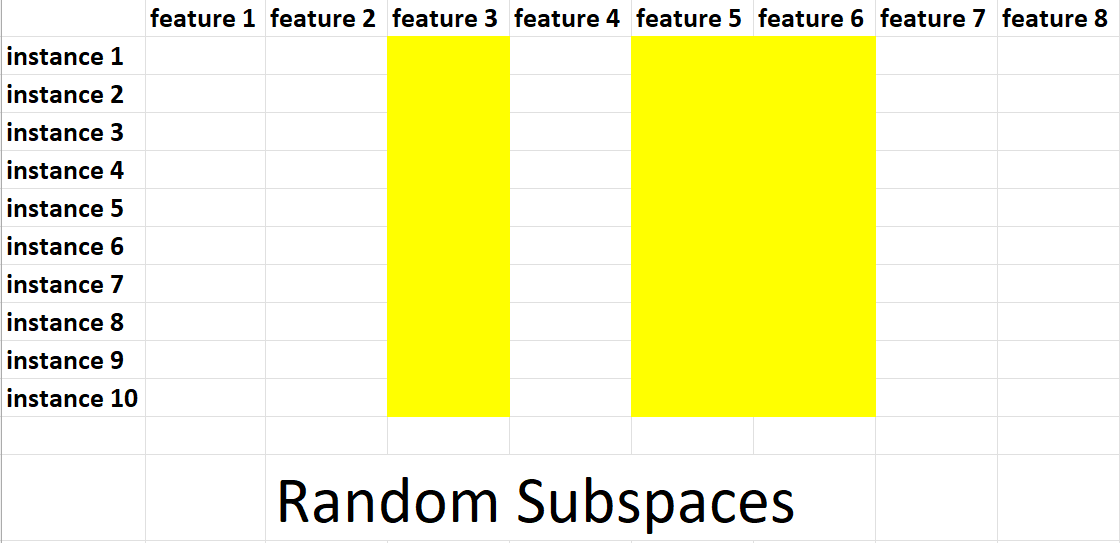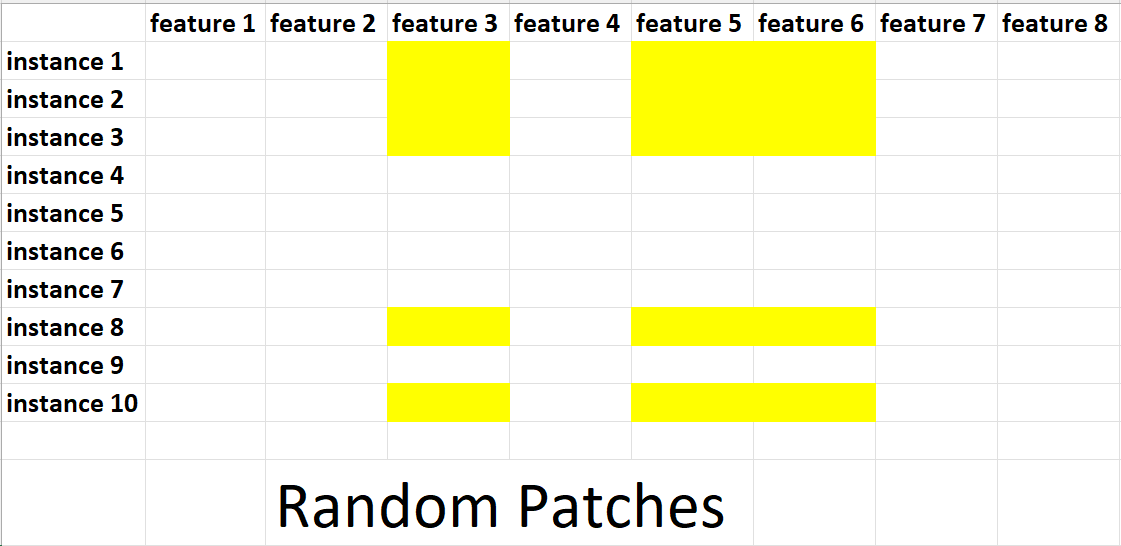

**Random Forests**

In [118]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(x_train,y_train)
rnf_pred = rnd_clf.predict(x_test)
accuracy_score(y_test,rnf_pred)

0.95

In [119]:
#the above RF is equivalent to this bagging:
bg_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(splitter='random', max_leaf_nodes=16),
                  n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)
bg_clf.fit(x_train,y_train)
bg_pred = bg_clf.predict(x_test)
accuracy_score(y_test, bg_pred)

1.0

Feature Importance

In [120]:
rnd_clf.feature_importances_

array([0.39962652, 0.60037348])

<BarContainer object of 2 artists>

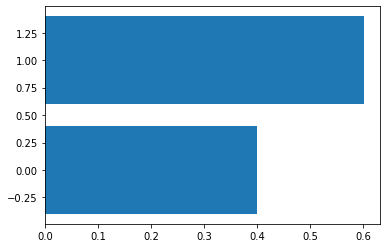

In [121]:
plt.barh(rnd_clf.classes_, rnd_clf.feature_importances_)

In [122]:
#feature importance with the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
x = iris['data']
y = iris['target']
iris_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
iris_clf.fit(x,y)
iris_clf.feature_importances_

array([0.09109316, 0.02297671, 0.46730661, 0.41862352])

<BarContainer object of 4 artists>

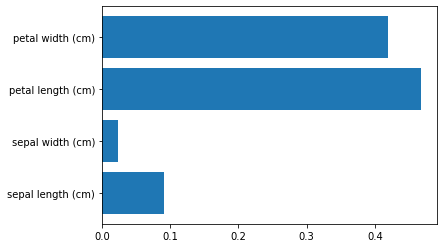

In [123]:
plt.barh(iris['feature_names'],iris_clf.feature_importances_)

Full example from my paper: https://colab.research.google.com/drive/1a2rlSJOrcLXQEwzawAJIEViDdpyq7RYm?usp=sharing

**Boosting**

1.AdaBoost

2.Gradient Boosting

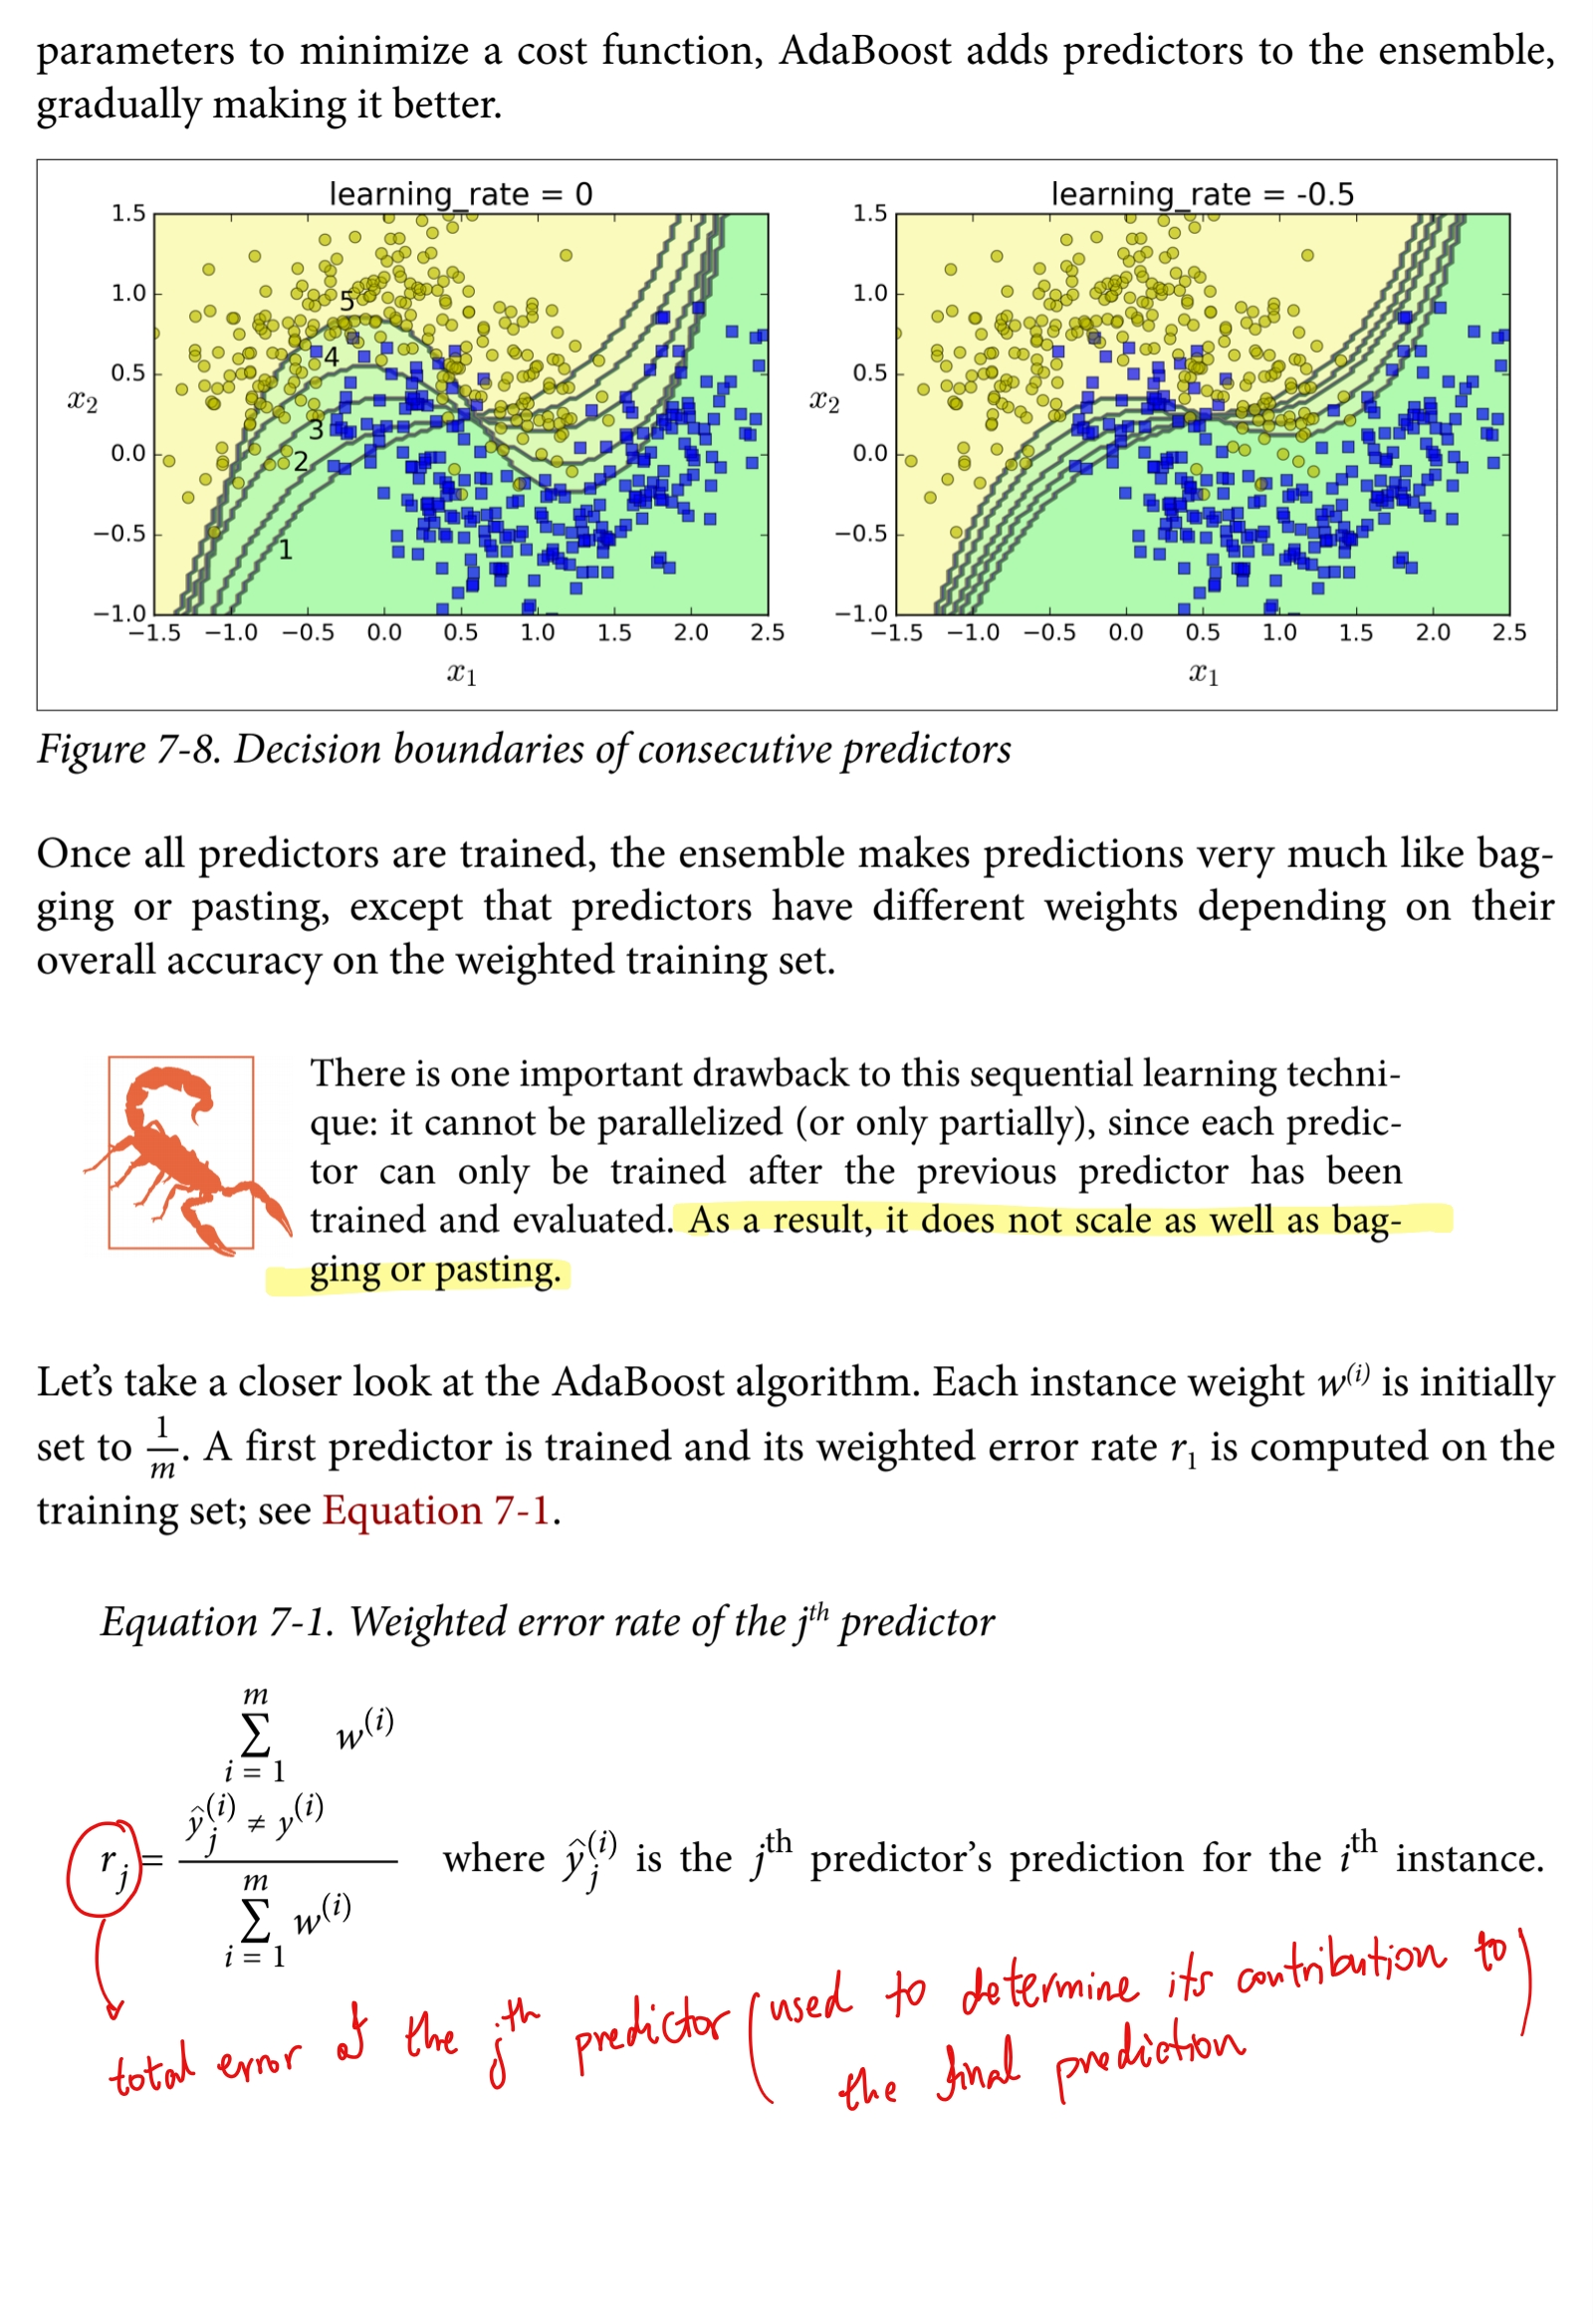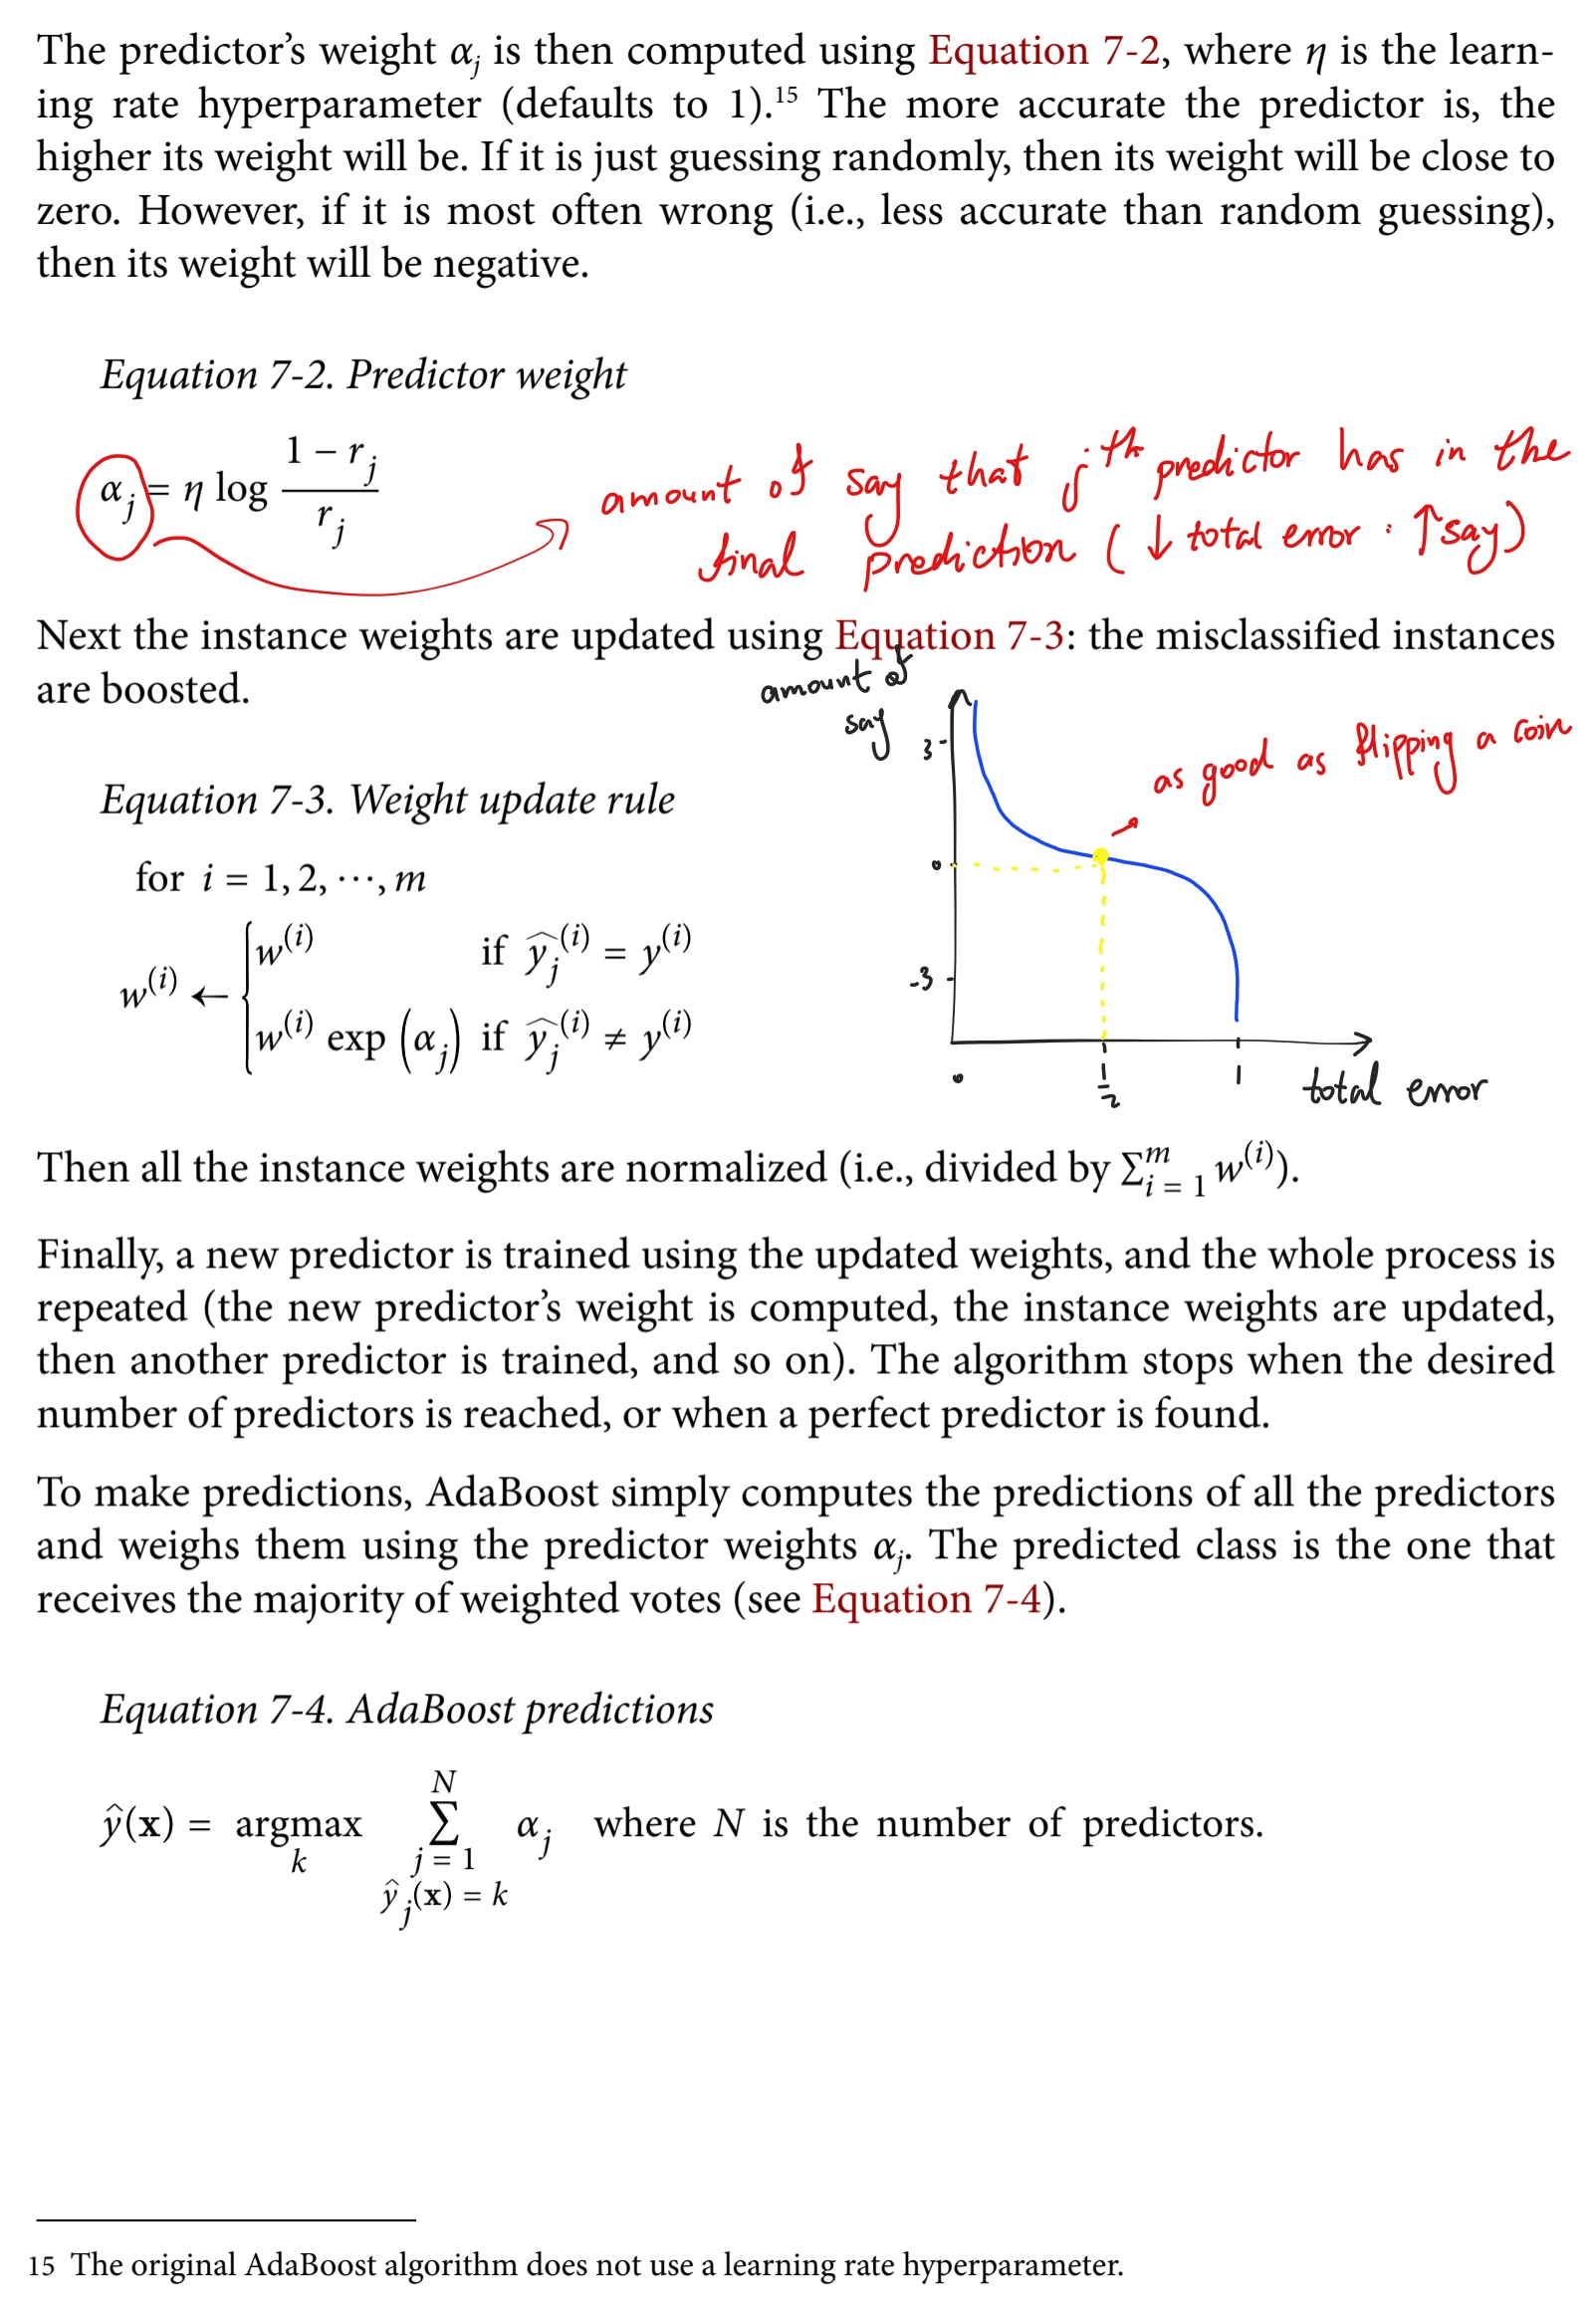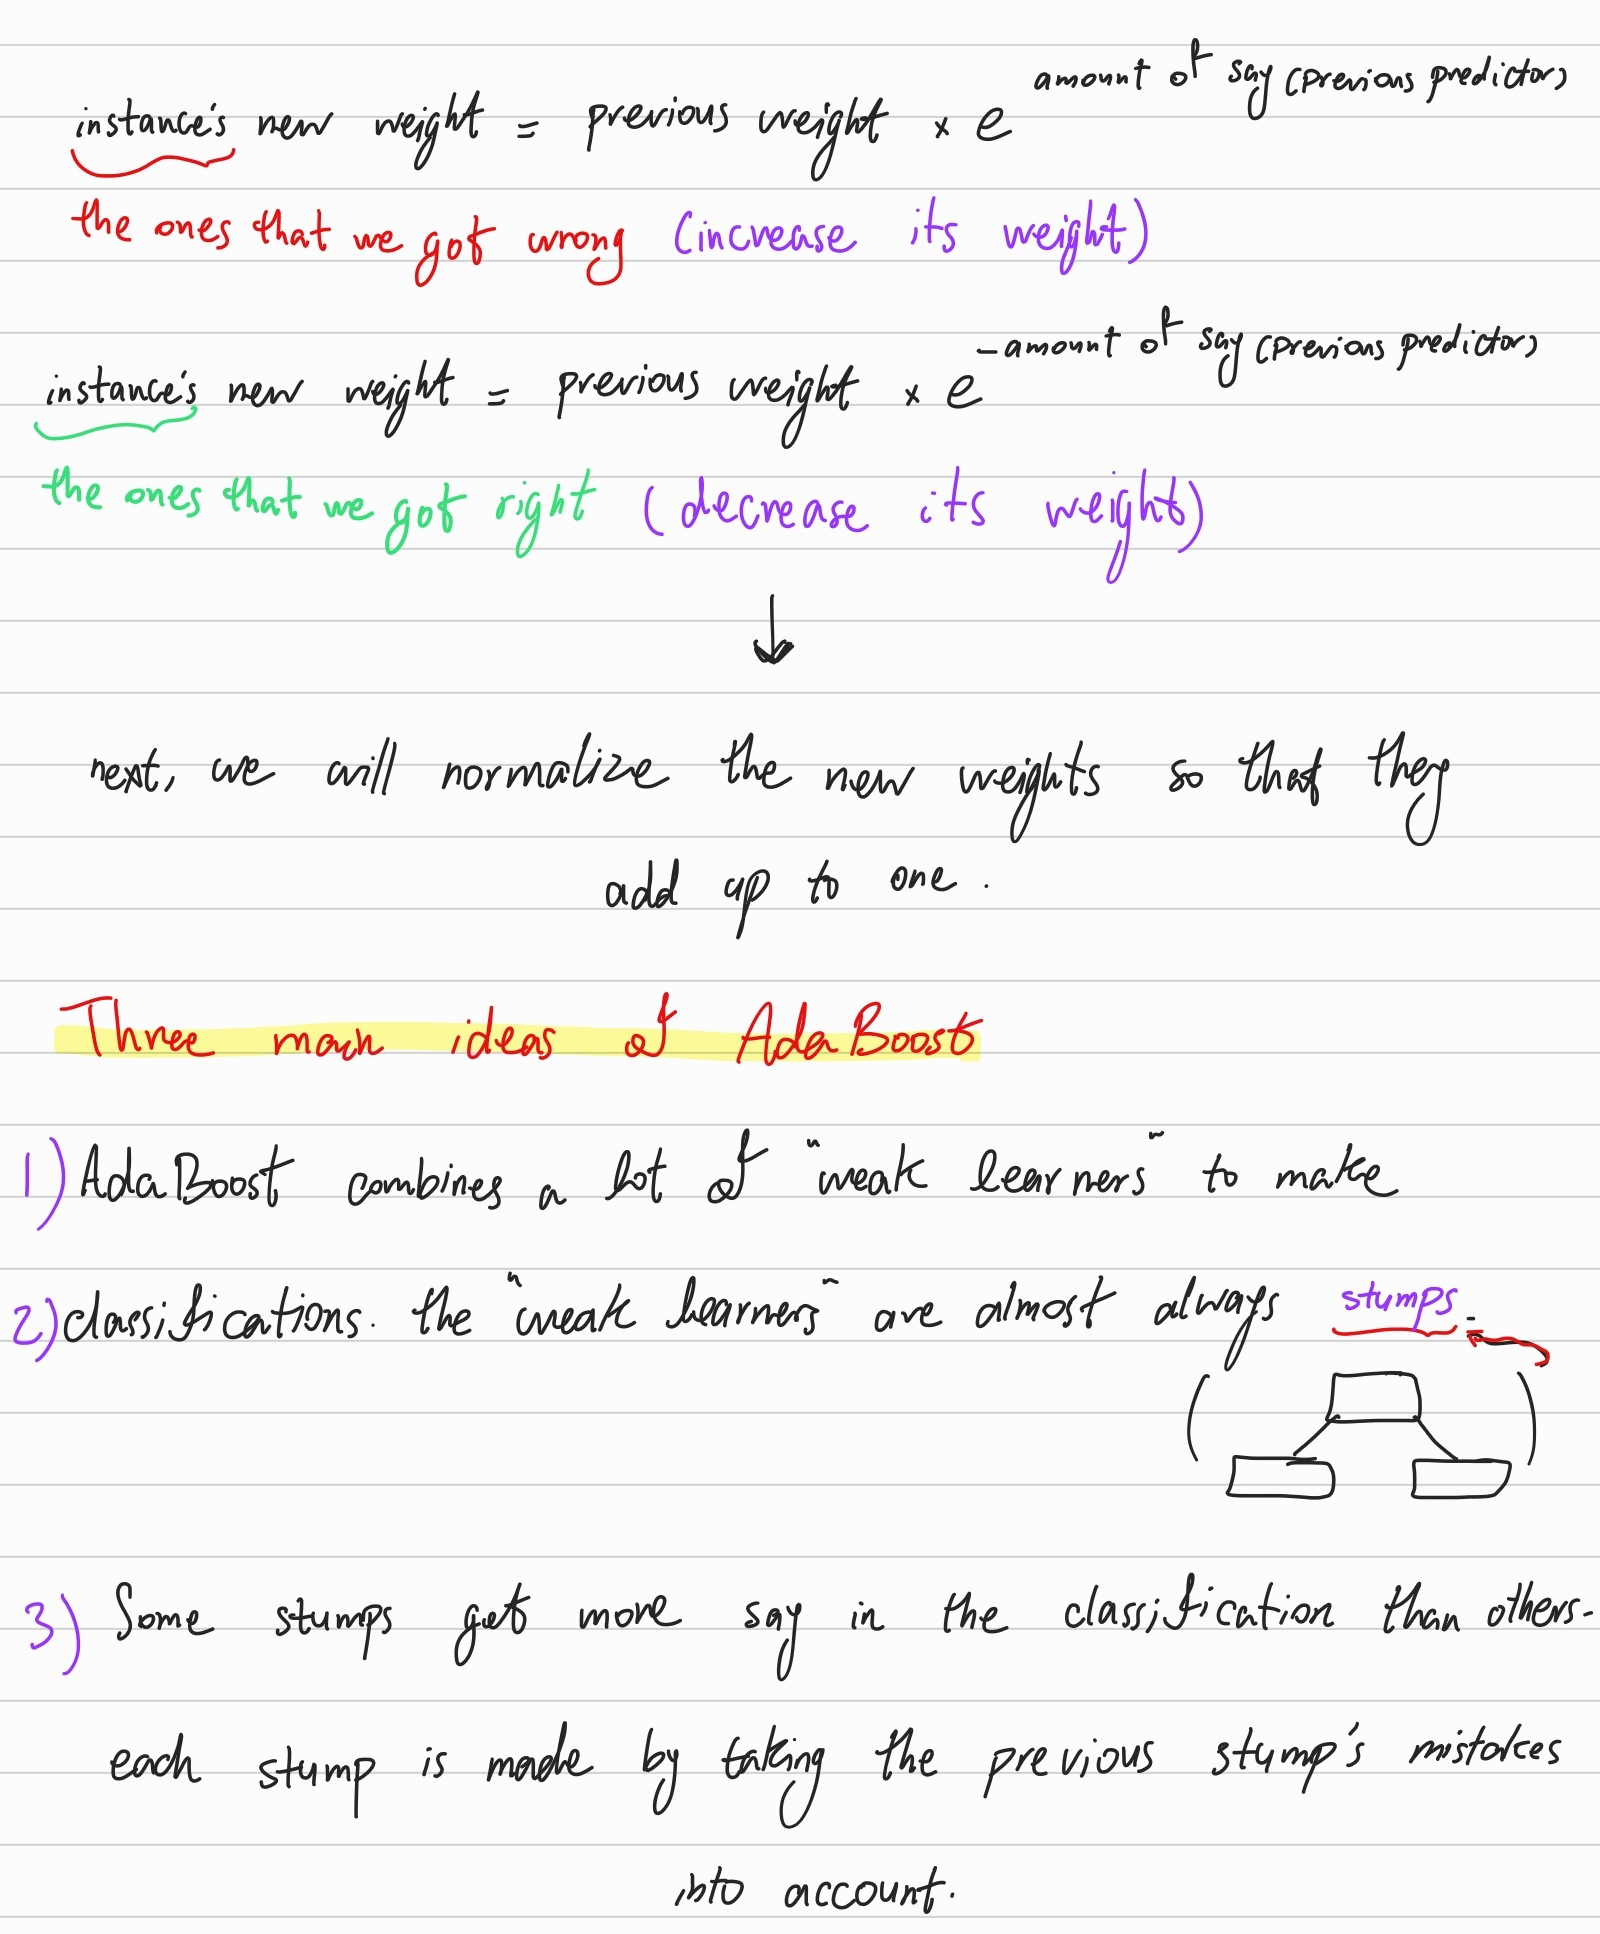

In [124]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                             learning_rate=0.5, algorithm='SAMME.R')
ada_clf.fit(x_train,y_train)
#if AdaBoost overfitts, try reducing n_estimators or more strongly regularize the base estimator

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2 ,n_estimators=3, learning_rate=1.0)
gbrt.fit(x_train,y_train)
#learning_rate scales the contribution of each tree
#low learning_rate --> the prediction will generalize better, but you need more trees.
#below: right:overfit left:underfit

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

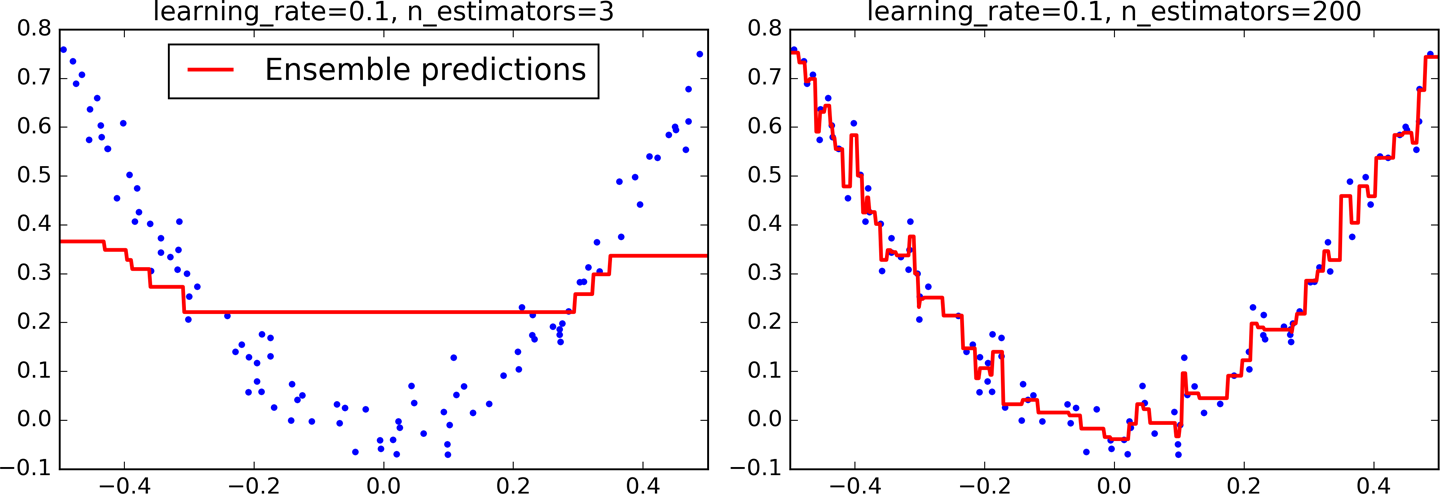

In [129]:
#finding the best number of trees manually
from sklearn.metrics import mean_squared_error

n_estimators = 500
error = []
for i in range(1,n_estimators):
  gbrt = GradientBoostingRegressor(n_estimators=i, max_depth=2)
  gbrt.fit(x_train,y_train)
  pred = gbrt.predict(x_test)
  error.append(mean_squared_error(y_test,pred))
print(error.index(min(error)))

330


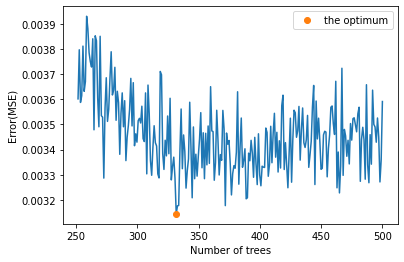

In [136]:
plt.plot(np.linspace(1,n_estimators,499)[250:],np.array(error)[250:])
plt.plot(np.linspace(1,n_estimators,499)[330],np.array(error)[330],'o',label='the optimum')
plt.ylabel('Error(MSE)')
plt.xlabel('Number of trees')
plt.legend()
plt.show()
#this is probably wrong!!

494


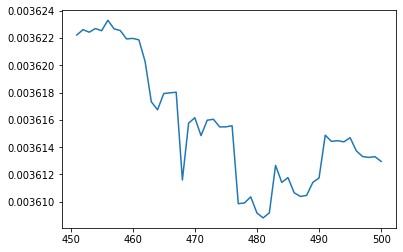

GradientBoostingRegressor(max_depth=2, n_estimators=384)

In [134]:
# or, we set the n_estimators and then use staged_predict to find the best number of trees to implement

gbrt = GradientBoostingRegressor(n_estimators=500, max_depth=2)
gbrt.fit(x_train,y_train)

errors = [mean_squared_error(y_test,pred) for pred in gbrt.staged_predict(x_test)]
bst_n_estimators = np.argmin(errors)
print(best_n_trees)
plt.plot(np.linspace(1,500,500)[450:],np.array(errors)[450:])
plt.show()

#why do they not match????

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(x_train, y_train)

**Stacking**

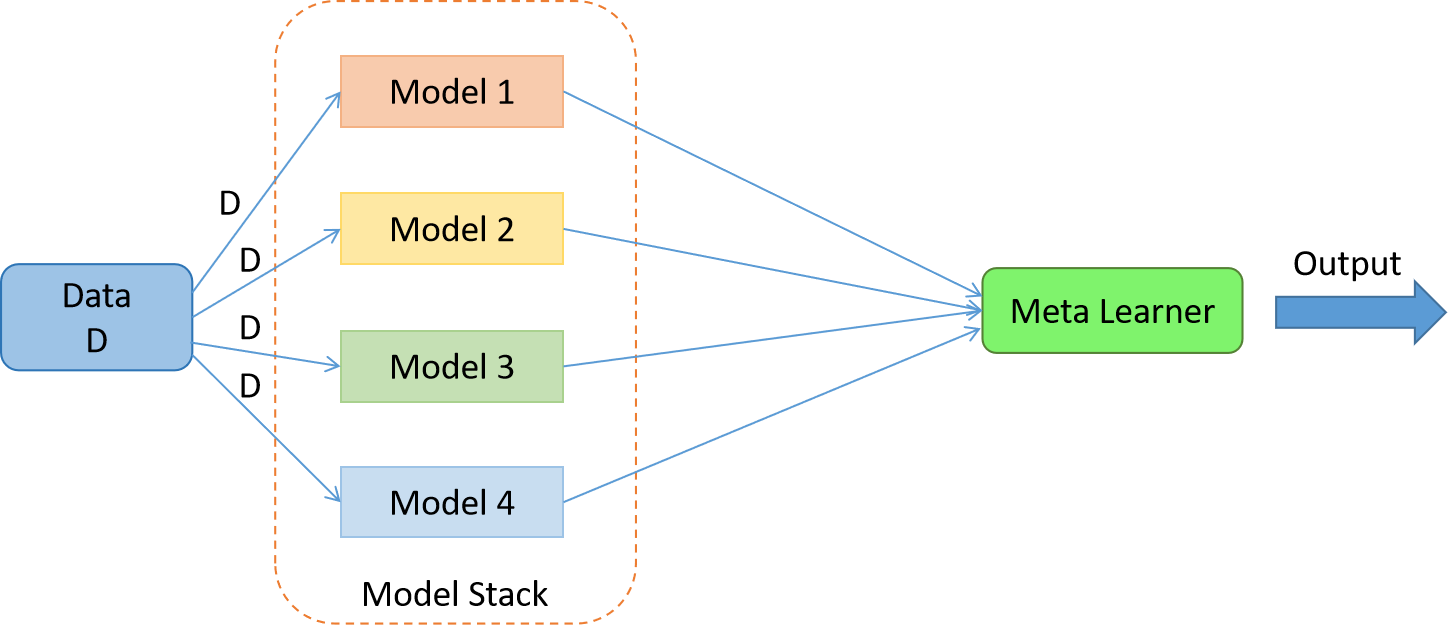